# Predicting Stroke in Patients Using Machine Learning
This notebook is a stroke prediction classification machine learning project with an imbalanced class. 

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient.

## What we'll end up with
Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.

To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.

We'll work through each step and by the end of the notebook, we'll have a handful of models, all which can predict whether or not a person has stroke based on a number of different parameters at a considerable accuracy.


## 1. Problem Definition
In this case, the problem we will be exploring is binary classification.

This is because we're going to be using a number of different features about a person to predict stroke probability.

In a statement,

    Given clinical parameters about a patient, can we predict whether or not a patient is likely to get stroke?
    

## 2. Data

The original data came in a formatted way from kaggle [stroke prediction dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) 

The original database contains 5110 observations with 12 attributes. **Attributes** (also called **features**) are the variables that we'll use to predict our **target variable**.


## 3. Evaluation
The evaluation metric is something to define at the start of a project.

Since machine learning is very experimental,

    If we can reach 95% accuracy at predicting whether or not a patient is likely to get stroke during the proof of concept, we'll pursue this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

## 4. Features
Features are different parts of the data. We're going to visualize the relationships between the different features of the data and how it can lead to stroke.

One of the most common ways to understand the features is to look at the **data dictionary**.

## Stroke Data Dictionary
A data dictionary describes the data you're dealing with, not all datasets come with them. 

The following are the features we'll use to predict our likely target variable (stroke or no stroke).

* 1 id: unique identifier
* 2 gender: "Male", "Female" or "Other"
* 3 age: age of the patient
* 4 hypertension: 
    * 0 if the patient doesn't have hypertension 
    * 1 if the patient has hypertension
* 5 heart_disease: 
    * 0 if the patient doesn't have any heart diseases 
    * 1 if the patient has a heart disease
* 6 ever_married: "No" or "Yes"
* 7 work_type: 
    * "children"
    * "Govt_jov" 
    * "Never_worked" 
    * "Private" or "Self-employed"
* 8 Residence_type: "Rural" or "Urban"
* 9 avg_glucose_level: average glucose level in blood
* 10 bmi: body mass index
* 11 smoking_status: 
    * "formerly smoked" 
    * "never smoked" 
    * "smokes" or "Unknown"*
* 12 stroke: 
    * 1 if the patient had a stroke 
    * 0 if not

**Note**: "Unknown" in smoking_status means that the information is unavailable for this patient

In [502]:
## Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib import style
import plotly.express as px
import plotly.figure_factory as ff

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# We want our plots to appear in the notebook
%matplotlib inline 

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [503]:
df =  pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [504]:
df.shape

(5110, 12)

### Exploratory Data Analysis
Since EDA has no real set methodolgy, the following is a short check list to to walk through:

1. From the dataframe features, can smoking induce stroke?
2. Can a person with a heart disease be more prone to having stroke?
3. Can a person with hypertension be more prone to having stroke?
4. Does gender play a role in a person being prone to stroke?
5. Does the work type, residence type, average glucose level, bmi, marital status, age play a role in a person having stroke? 
6. What’s missing from the data and how do you deal with it?

In [505]:
# Check the first 10 rows of the dataframe
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [506]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe plus the proportion
print('Length of entire data:', len(df))
print('Length of non stroke patient:', len(df[df['stroke']==0]))
print('Length of stroke patient:', len(df[df['stroke']==1]))

Length of entire data: 5110
Length of non stroke patient: 4861
Length of stroke patient: 249


Since these two values are not close, our target column can be considered **imbalanced**. An **imbalanced** target column, meaning some classes have far more samples, can be harder to model than a balanced set. From our data dictionary, if the patient has a stroke, it is denoted with 1, if the patient does not have stroke, it is denoted as 0.

In [507]:
# Normalized value counts
df.stroke.value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


From the pandas dataframe above,
* id, hypertension, heart_disease and stroke are int datatype.
* gender, ever_married, work_type, Residence_type and smoking_status are object datatype.
* age, avg_glucose_level and bmi are float datatype.

In [509]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [510]:
# Check for missing values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [511]:
# Check for which numeric columns have null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

bmi


In [512]:
# Fill numeric rows with the median
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            
            # Add a binary column which tells if the data was missing or not
            df[label+"_is_missing"] = pd.isnull(content)
            
            # Fill missing numeric values with median since it's more robust than the mean
            df[label] = content.fillna(content.median())

In [513]:
# Check if there's any null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Replacing 0 and 1 with "No" and "Yes" in Hypertension and Heart Disease columns.

In [514]:
df['hypertension'].replace([0, 1], ['No', 'Yes'], inplace=True)
df['heart_disease'].replace([0, 1], ['No', 'Yes'], inplace=True)

In [515]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_is_missing
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1,False
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,True
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1,False
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1,False
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,False


Categorising BMI into "Underweight", "Normal Weight", "Overweight" and "Obese".

In [516]:
results=[]

for i in df['bmi']:
    if (i < 19.5):
        results.append('Underweight')
   
    elif (i >= 19.5) & (i < 25.5):
        results.append('Normal Weight')
        
    elif (i >= 25.5) & (i < 30.0):
        results.append('Overweight')
        
    elif (i > 30.0):
        results.append('Obese')
        
results2 = pd.DataFrame(results, columns=['bmi_category'])

df['bmi_category']=results2

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_is_missing,bmi_category
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1,False,Obese
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,True,Overweight
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1,False,Obese
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1,False,Obese
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,False,Normal Weight


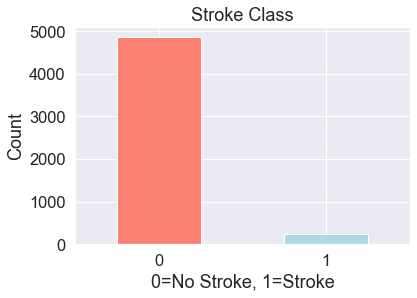

In [517]:
# Plot the stroke value counts with a bar graph
df.stroke.value_counts().plot(kind='bar', title='Stroke Class', color=['salmon', 'lightblue'])
plt.xlabel('0=No Stroke, 1=Stroke')
plt.ylabel('Count')
plt.xticks(rotation=0);

### Stroke Frequency per Gender

In [518]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [519]:
# Remove the 'other' gender
df.drop(df[df['gender'] == 'Other'].index, inplace = True)
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [520]:
df.gender.value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [521]:
# Compare stroke column with gender column
pd.crosstab(df.stroke, df.gender)

gender,Female,Male
stroke,,
0,2853,2007
1,141,108


**Observation**:

Since there are 2994 women, 2853 women do not have stroke and 141 of them have a stroke, we might infer, based on this one variable if the participant is a woman, there's a 4.7% chance she will have a stroke.

As for males, there are 2115 males, 2007 men do not have stroke and 108 of them have a stroke. So we might predict, if the participant is male, 5.1% chance he will have stroke.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 4.9% chance they have stroke.

### Stroke Frequency for Gender

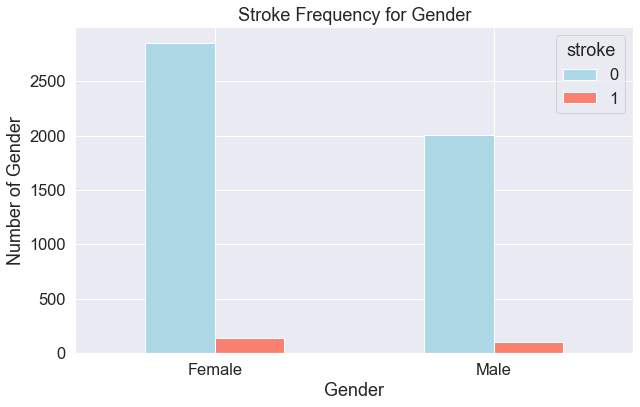

In [522]:
# Create a plot
pd.crosstab(df.gender, df.stroke).plot(kind='bar',
                                   figsize=(10, 6),
                                   color= ['lightblue', 'salmon']);

# Add some attributes to it
plt.title("Stroke Frequency for Gender")
plt.xlabel('Gender')
plt.ylabel('Number of Gender')
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

**Observation:**
From the bar chart above, The likelihood of having stroke for both genders is almost equal but females are slightly more prone to having stroke.

### Age vs Average Glucose Level for Stroke
Let's try combining a couple of independent variables, such as, age and avg_glucose_level and then comparing them to our stroke target column.

Because there are so many different values for age and average glucose level, we'll use a scatter plot.

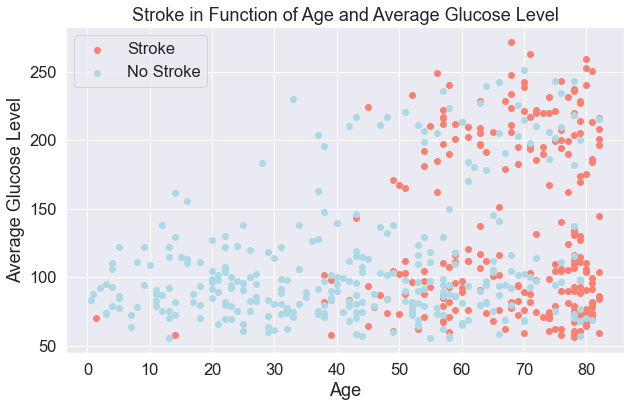

In [523]:
# Create another figure
plt.figure(figsize=(10, 6))

# Start with positive examples
plt.scatter(df.age[df.stroke==1][:300],
            df.avg_glucose_level[df.stroke==1][:300],
            c='salmon')

# For negative example, we want them on the same plot, so we call the plt function again
plt.scatter(df.age[df.stroke==0][:300],
            df.avg_glucose_level[df.stroke==0][:300],
            c='lightblue') 

# Add some helpful information
plt.title('Stroke in Function of Age and Average Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.legend(['Stroke', 'No Stroke']);

**Observation**:

It seems the older a person is, the higher their average glucose level (red dots are higher on the right of the graph). Also, a large proportion of the scatter plot points on the y-axis are concentrated between (50-150), and from my observation, it looks like there are outliers upwards of 150 which indicates people with a high glucose level which might be a factor in causing stroke for older people.

Let's check the age **distribution** with a histogram.

### Stroke frequency per Age

In [524]:
df_age = df.groupby('age', as_index=False)['stroke'].sum()
fig = px.histogram(df_age, 
                   x = "age",
                   y = "stroke", 
                   barmode = "group", 
                   nbins = 10, 
                   opacity = 0.75, 
                   range_x = [0,85],
                   color_discrete_sequence=px.colors.qualitative.Light24)

fig.update_layout(height = 500, 
                  width = 700, 
                  title_text ='Stroke Frequency per Age',
                  title_font_size= 20,
                  title_y = 0.97,
                  title_x = 0.48,
                  yaxis_title = 'Stroke Frequency')

fig.show()

**Observation**:

From the histogram above, the older a person is, the higher their chances of getting stroke.

### Stroke Frequency per Age and Gender combined

In [525]:
df_age_gender = df.groupby(['gender', 'age'], as_index=False)['stroke'].sum()
fig = px.histogram(df_age_gender,
                   x = 'age',
                   y = 'stroke',
                   color = 'gender',
                   barmode = 'group',
                   nbins = 10,
                   opacity = 0.75,
                   color_discrete_sequence = px.colors.qualitative.Prism)

fig.update_layout(height = 500,
                  width = 700,
                  title_text = 'Stroke frequency per Age and Gender',
                  title_font_size = 20,
                  title_y = 0.95,
                  title_x = 0.48,
                  yaxis_title = 'Stroke Frequency')

fig.show()

**Observation:**

The histogram above indicates that the older a person gets, the more likely they are to have stroke and if the gender is female, the older a female gets, the more likely she is to get stroke compared to a male except between the ages of 55-64 where men are more likely to have stroke in comparison to females.

### Stroke Frequency per Hypertension

In [526]:
# Compare stroke column with hypertension column
pd.crosstab(df.stroke, df.hypertension)

hypertension,No,Yes
stroke,,
0,4428,432
1,183,66


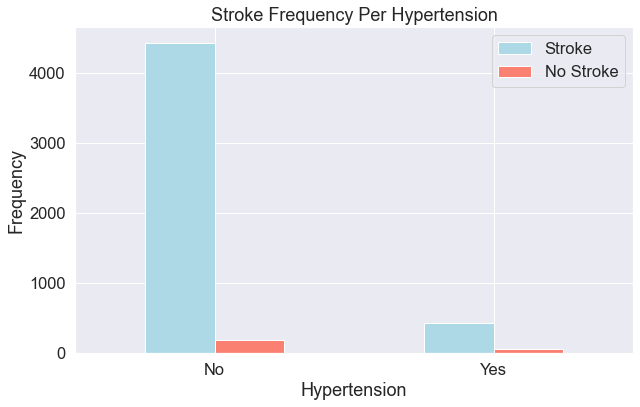

In [527]:
# Create a new crosstab and base plot
pd.crosstab(df.hypertension, df.stroke).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Stroke Frequency Per Hypertension")
plt.xlabel("Hypertension")
plt.ylabel("Frequency")
plt.legend(["Stroke", "No Stroke"])
plt.xticks(rotation = 0);

**Observation:**

From the bar plot above, we can see that patients that do not have hypertension slightly have a higher chance of having stroke while there is a chance that those that have hypertension can get stroke also but the likelihood of having stroke is far lesser for people with hypertension than those without hypertension. 

### Stroke frequency per Smoking Status

We're going to compare the stroke class with the smoking status. We're trying to deduce if smoking or not smoking plays a role in a person having stroke.

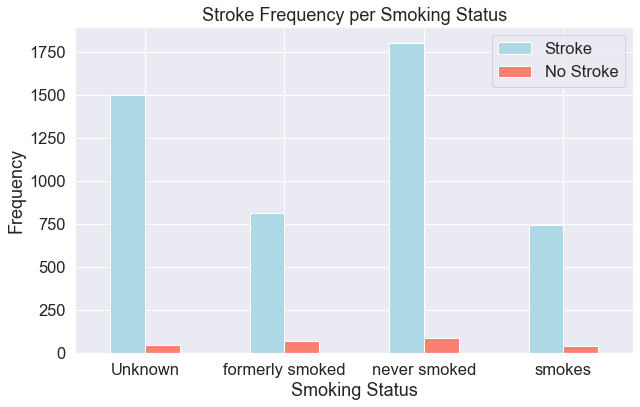

In [528]:
# Compare the stroke column with the smoking status
pd.crosstab(df.smoking_status, df.stroke).plot(kind='bar',
                                               figsize=(10, 6),
                                               color=['lightblue', 'salmon'])
plt.title('Stroke Frequency per Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(['Stroke', 'No Stroke']);

**Observation:**

From the bar chart above, People that have never smoked tend to be more susceptible to having stroke than those that are still smoking and those that formerly smoked.

### Stroke Frequency per Heart Disease

In [529]:
# Compare stroke column with heart disease column
pd.crosstab(df.stroke, df.heart_disease)

heart_disease,No,Yes
stroke,,
0,4631,229
1,202,47


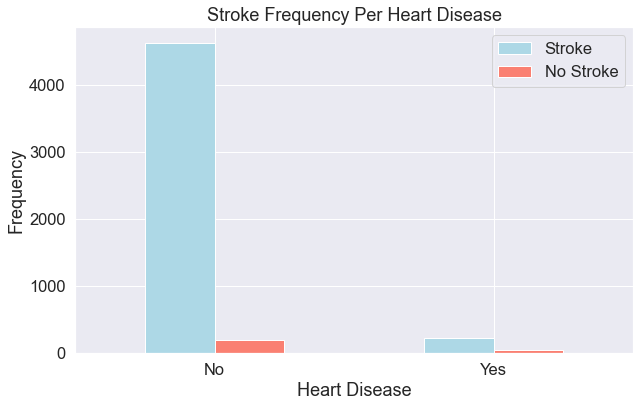

In [530]:
# Create a new crosstab and base plot
pd.crosstab(df.heart_disease, df.stroke).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Stroke Frequency Per Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Frequency")
plt.legend(["Stroke", "No Stroke"])
plt.xticks(rotation = 0);

**Observation:**

As the case above with hypertension, from the barchart above, people that do not have a heart disease tend to be more susceptible to having stroke than those with heart disease.

### Stroke Frequency per Body Mass Index

In [531]:
df_bmi = df.groupby('bmi_category', as_index=False)['stroke'].sum()

fig = px.bar(df_bmi,
             x = 'bmi_category',
             y = 'stroke',
             color = 'bmi_category',
             opacity = 1,
             color_discrete_sequence = px.colors.qualitative.D3)

fig.update_layout(height = 700,
                  width = 750,
                  title_text = 'Stroke Frequency per BMI',
                  title_font_size= 20,
                  title_y = 0.97,
                  title_x = 0.48,
                  yaxis_title = 'Stroke Frequency')

fig.show()

**Observation:**

From the bar chart above, the likelihood of a person having stroke is high if the person is overweight or obese.

### Stroke Frequency per Work Type

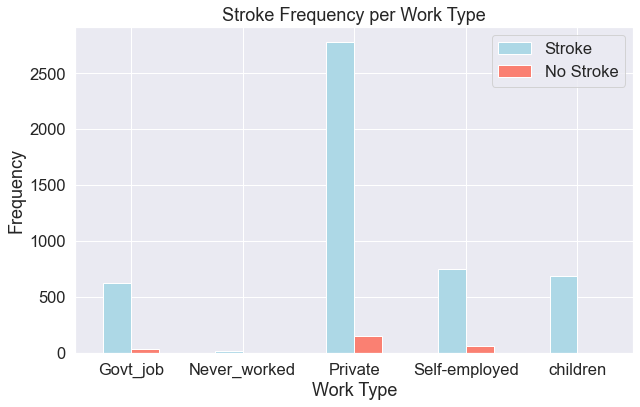

In [532]:
# Compare the stroke column with the work type
pd.crosstab(df.work_type, df.stroke).plot(kind='bar',
                                               figsize=(10, 6),
                                               color=['lightblue', 'salmon'])
plt.title('Stroke Frequency per Work Type')
plt.xlabel('Work Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(['Stroke', 'No Stroke']);

**Observation:**

From the bar chart above, the likelihood of a person having stroke is higher if the person works for a private company.

### Stroke Frequency per Residence Type

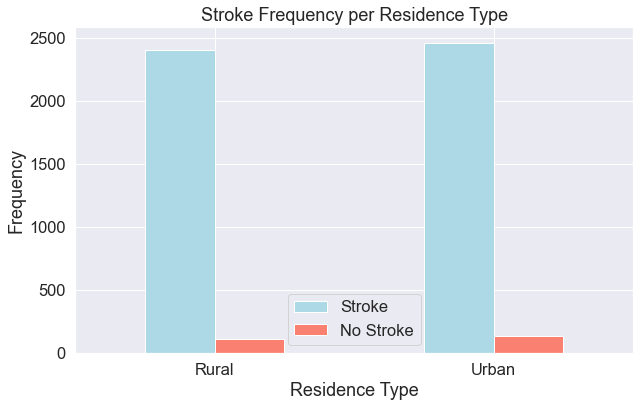

In [533]:
# Compare the stroke column with the residence type
pd.crosstab(df.Residence_type, df.stroke).plot(kind='bar',
                                               figsize=(10, 6),
                                               color=['lightblue', 'salmon'])
plt.title('Stroke Frequency per Residence Type')
plt.xlabel('Residence Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(['Stroke', 'No Stroke']);

**Observation:**

From the bar chart above, the likelihood of a person having stroke is slightly higher if the person lives in an urban area. But the likelihood of having stroke is almost similar for people living in rural and urban areas.

### Stroke Frequency per Married or Not

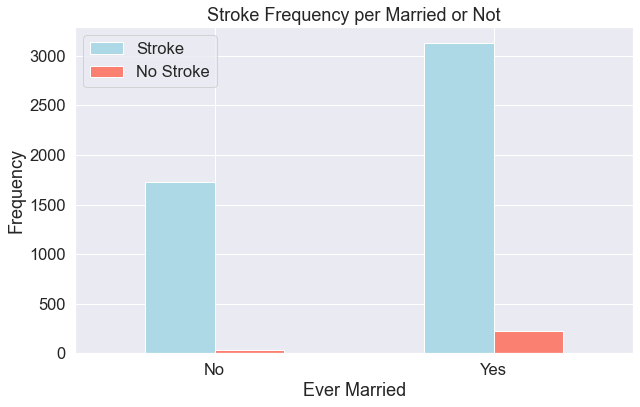

In [534]:
# Compare the stroke column with the Marital Status
pd.crosstab(df.ever_married, df.stroke).plot(kind='bar',
                                               figsize=(10, 6),
                                               color=['lightblue', 'salmon'])
plt.title('Stroke Frequency per Married or Not')
plt.xlabel('Ever Married')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(['Stroke', 'No Stroke']);

**Observation:**

The probability of having stroke is higher for people that have gotten married at some point or still married than people that have never married. One factor could be that people that get married on average tend to be older people and the propensity to have stroke tend to be higher for older people.

### Check for Outliers

In [535]:
bmi=list(df['bmi'].values)
hist_data=[bmi]

group_lables=['bmi']
colour=['Red']

fig=ff.create_distplot(hist_data,group_lables,show_hist=True,colors=colour)
fig.show()

**Observation**:

From the histogram above, the distribution of the histogram is a unimodal distribution, outliers are present on the right side of the histogram and due to the outliers, the histogram plot is right skewed, we can either remove the outliers or the distribution curve can be made less-skewed by mapping the values with a log but both cases will lead to loss of the number of datapoints with Stroke = 1

In [537]:
bmi=list(df['bmi'].values)
hist_data=[bmi]

group_lables=['bmi']
colour=['Red']

fig=ff.create_distplot(hist_data,group_lables,show_hist=True,colors=colour)
fig.show()

df.drop(df[df['bmi'] > 47].index, inplace = True)
print("The shape after removing the BMI outliers : ",df.shape)

The shape after removing the BMI outliers :  (4992, 14)


**Observation**:

After removing the outliers, the range is now between 15 and 45 which is where most of the bmi samples are distributed. 

### Modelling

We've explored the data, now we'll try to use machine learning to predict our target variable based on the independent variables.

Remember our problem?

    Given clinical parameters about a patient, can we predict whether or not a patient is likely to get stroke?

That's what we'll be trying to answer.

### Categorical  Encoding using LabelEncoder

In [538]:
# Check the first 5 rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_is_missing,bmi_category
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1,False,Obese
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,True,Overweight
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1,False,Obese
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1,False,Obese
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,False,Normal Weight


In [539]:
# Check the datatype
df.dtypes

id                     int64
gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
bmi_is_missing          bool
bmi_category          object
dtype: object

In [540]:
# Replace the no and yes with int 0, 1
df['hypertension'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['heart_disease'].replace(['No', 'Yes'], [0, 1], inplace=True)

In [541]:
# Check the first 5 rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_is_missing,bmi_category
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,False,Obese
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,True,Overweight
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,False,Obese
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,False,Obese
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,False,Normal Weight


In [542]:
# Turning the categorical variables into numbers with Label Encoder
from sklearn.preprocessing import LabelEncoder

# List the categorical features
categorical_features = ["gender","ever_married","work_type","Residence_type","smoking_status"]

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_features:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

In [544]:
# Check the first 5 rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_is_missing,bmi_category
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1,False,Obese
1,51676,0,61.0,0,0,1,3,0,202.21,28.1,2,1,True,Overweight
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1,False,Obese
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1,False,Obese
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1,False,Normal Weight


After converting the categorical columns into numerical variables, drop the bmi_is_missing and bmi_category columns.

In [545]:
# Drop bmi_is_missing and bmi category column
df.drop(['bmi_is_missing', 'bmi_category'], axis=1, inplace=True)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [546]:
print('Rows containing 0 =', len(df[df['stroke']==0]))
print('Rows containing 1 =', len(df[df['stroke']==1]))

Rows containing 0 = 4746
Rows containing 1 = 246


c:\Users\HP\Desktop\Personal_projects\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



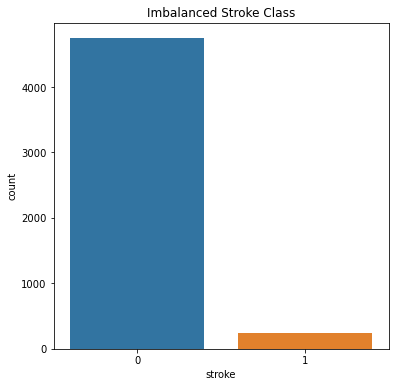

In [390]:
# Plot the stroke value counts with a bar graph
plt.figure(figsize=(6, 6))
sns.countplot('stroke', data=df)
plt.title('Imbalanced Stroke Class')
plt.show();

### What is Data Imbalance?
Data imbalance usually reflects an unequal distribution of classes within a dataset. As with the data set we're working with, The proportion of people with stroke and people without stroke is **19.52 : 1**. If we train our binary classification model without fixing this problem, the model will be completely biased towards the no stroke predition class. Since all of our data is numeric and there are no missing values and we have a highly **imbalanced** class, we'll attempt to balance the dataset by **OverSampling** the majority class.

In [411]:
# Split into X and y
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split into training and test dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, stratify=y, shuffle=True, random_state=42)

In [412]:
X.shape, y.shape

((4992, 11), (4992,))

In [413]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3494, 11), (3494,), (1498, 11), (1498,))

### OverSampling

We're trying to predict our stroke variable using all of the other variables and to be able to do this, we will have to oversample the target column by increasing the minority class to match the majority class.

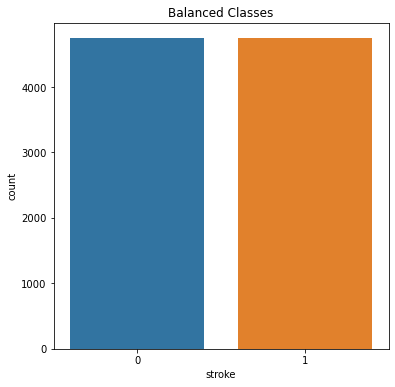

In [414]:
# Oversample and plot imbalanced dataset with SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_oversampled, y_oversampled = sm.fit_resample(X, y)

# Plot the dataframe after oversampling
plt.figure(figsize=(6, 6))
sns.countplot(x = y_oversampled, data = df)
plt.title('Balanced Classes')
plt.show();

In [415]:
# Train again with the new data
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size = 0.2, random_state = 42)

We're going to be using 3 models to evaluate the oversampled dataset:

1. KNeighborsClassifier
2. Logistic Regression
3. RandomForestClassifier

All of the algorithms in the Scikit-Learn library use the same functions, for training a model, model.fit(X_train, y_train) and for scoring a model model.score(X_test, y_test). score() returns the ratio of correct predictions (1.0 = 100% correct).

Since the algorithms we've chosen implement the same methods for fitting them to the data as well as evaluating them, let's put them in a dictionary and create a function which fits and scores them.

### Logistic Regression

In [435]:
# Logistic Regression
np.random.seed(42)

# Instantiate the model
log_reg=LogisticRegression()

# Fit the model
log_reg.fit(X_train,y_train)

# Make predictions on the model
y_pred_log_reg=log_reg.predict(X_test)

print(classification_report(y_test,y_pred_log_reg));

              precision    recall  f1-score   support

           0       0.82      0.72      0.77       958
           1       0.75      0.84      0.79       941

    accuracy                           0.78      1899
   macro avg       0.78      0.78      0.78      1899
weighted avg       0.79      0.78      0.78      1899



c:\Users\HP\Desktop\Personal_projects\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### Confusion Matrix of LogisticRegression Model

[[693 265]
 [151 790]]


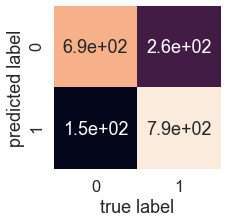

In [547]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_pred_log_reg):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred_log_reg),
                     annot=True, 
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_pred_log_reg)
print(confusion_matrix(y_test,y_pred_log_reg))

You can see the model gets confused (predicts the wrong label) relatively the same across both classes. In essence, there are 265 occasaions where the model predicted 0 when it should've been 1 (false negative) and 151 occasions where the model predicted 1 instead of 0 (false positive).

### ROC Curve and AUC Scores for the Logistic Regression model

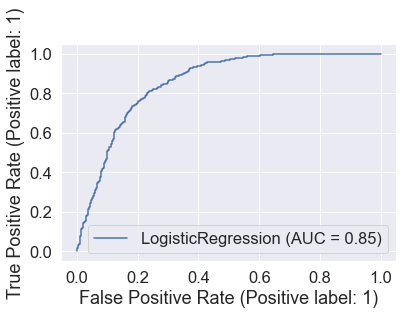

In [439]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(log_reg, X_test, y_test);

This is great, the model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.85. But a perfect model would achieve an AUC score of 1.0.

### KNeighborsClassifier

In [432]:
np.random.seed(42)

# Instantiate the model
knn = KNeighborsClassifier()

# Fit the model
knn.fit(X_train, y_train)

# Make predictions on the model
knn_pred = knn.predict(X_test)

print(classification_report(knn_pred, y_test))

              precision    recall  f1-score   support

           0       0.70      0.84      0.77       802
           1       0.87      0.74      0.80      1097

    accuracy                           0.78      1899
   macro avg       0.78      0.79      0.78      1899
weighted avg       0.80      0.78      0.79      1899



### Confusion Matrix of KNeighborsClassifier Model

[[693 265]
 [151 790]]


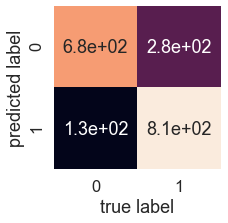

In [548]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, knn_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, knn_pred),
                     annot=True, 
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, knn_pred)
print(confusion_matrix(y_test,y_pred_log_reg))

There are 265 occasaions where the model predicted 0 when it should've been 1 (false negative) and 151 occasions where the model predicted 1 instead of 0 (false positive).

### ROC Curve and AUC Scores for the KNeighborsClassifier Model

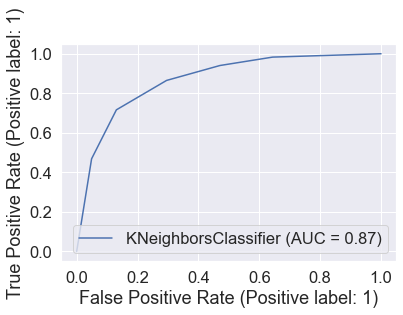

In [440]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(knn, X_test, y_test);

This is great, the model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.87. But a perfect model would achieve an AUC score of 1.0.

### Random Forest

In [431]:
np.random.seed(42)

# Instantiate the model
rfc = RandomForestClassifier()

# Fit the model
rfc.fit(X_train, y_train)

# Make predictions on the model
rfc_pred = rfc.predict(X_test)

print(classification_report(rfc_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       906
           1       0.96      0.91      0.93       993

    accuracy                           0.93      1899
   macro avg       0.93      0.93      0.93      1899
weighted avg       0.93      0.93      0.93      1899



### Confusion Matrix of RandomForest Model

[[867  91]
 [ 39 902]]


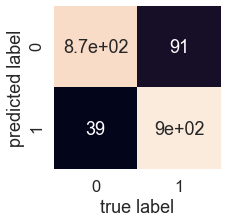

In [549]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, rfc_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, rfc_pred),
                     annot=True, 
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, rfc_pred)
print(confusion_matrix(y_test,rfc_pred))

There are 91 occasaions where the model predicted 0 when it should've been 1 (false negative) and 39 occasions where the model predicted 1 instead of 0 (false positive).

### ROC Curve and AUC Scores for the RandomForestClassifier Model

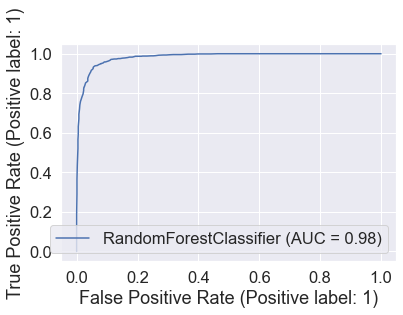

In [441]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(rfc, X_test, y_test);

This is great, the model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.98. But a perfect model would achieve an AUC score of 1.0.

### Correlation between independent variables

In [446]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.001084,0.004530,0.004924,-0.003105,0.013245,-0.016010,-0.000500,0.008374,0.022454,0.013010,0.007122
gender,0.001084,1.000000,-0.026396,0.021259,0.085292,-0.027840,0.053527,-0.006503,0.057846,-0.002080,-0.062219,0.009486
age,0.004530,-0.026396,1.000000,0.279439,0.265650,0.681758,-0.365016,0.014201,0.234709,0.375608,0.270463,0.246766
hypertension,0.004924,0.021259,0.279439,1.000000,0.112666,0.166657,-0.055112,-0.007064,0.170371,0.152624,0.111612,0.130629
heart_disease,-0.003105,0.085292,0.265650,0.112666,1.000000,0.116883,-0.029802,0.001406,0.168375,0.060916,0.049298,0.135681
ever_married,0.013245,-0.027840,0.681758,0.166657,0.116883,1.000000,-0.357261,0.005465,0.151549,0.371626,0.265770,0.109481
work_type,-0.016010,0.053527,-0.365016,-0.055112,-0.029802,-0.357261,1.000000,-0.007535,-0.050531,-0.327688,-0.309291,-0.034731
Residence_type,-0.000500,-0.006503,0.014201,-0.007064,0.001406,0.005465,-0.007535,1.000000,-0.000102,0.013617,0.010527,0.014043
avg_glucose_level,0.008374,0.057846,0.234709,0.170371,0.168375,0.151549,-0.050531,-0.000102,1.000000,0.171816,0.065423,0.130086
bmi,0.022454,-0.002080,0.375608,0.152624,0.060916,0.371626,-0.327688,0.013617,0.171816,1.000000,0.246661,0.053121


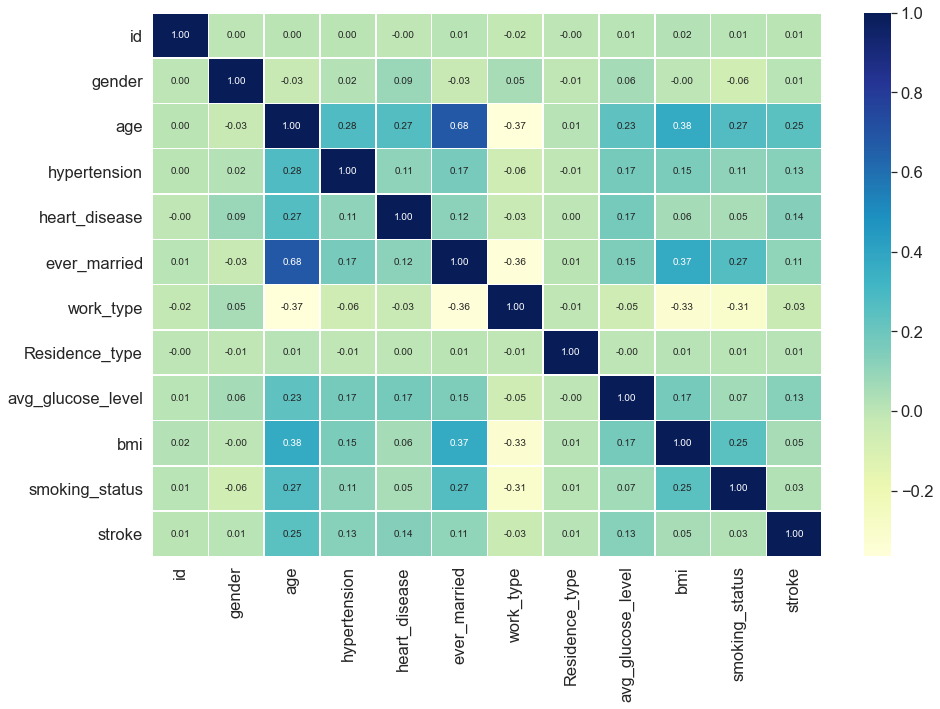

In [447]:
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

**Observation:**
    
It looks like there is no correlation between the independent variables. The only correlation is between **age** and **ever_married** and that is because as people get older, they tend to get married and settle down. 

After instantiating the 3 models and plotting their AUC curve, Random Forest has the highest **accuracy 0.93 , f1 score 0.93 and AUC of 0.98**. 

In [449]:
import pickle

# Save an existing model to a file
pickle.dump(rfc, open('gs_random_forest_model.pkl', 'wb'))